In [1]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from statsmodels.discrete.discrete_model import Probit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({"figure.figsize":(10,7),"figure.dpi":110})

In [2]:
df_student = pd.read_stata("ologit.dta")
df_student.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


In [3]:
df_student.shape

(400, 4)

In [4]:
import seaborn as sns

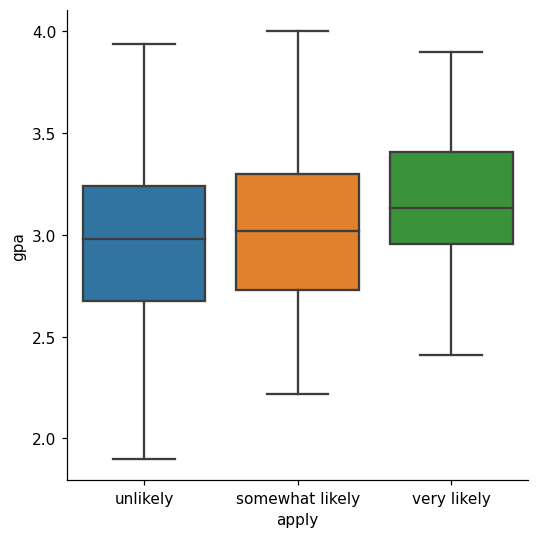

In [6]:
sns.catplot(x="apply",y="gpa",data=df_student,kind="box");
# Whether the students are likely to apply for college admission based on their GPA

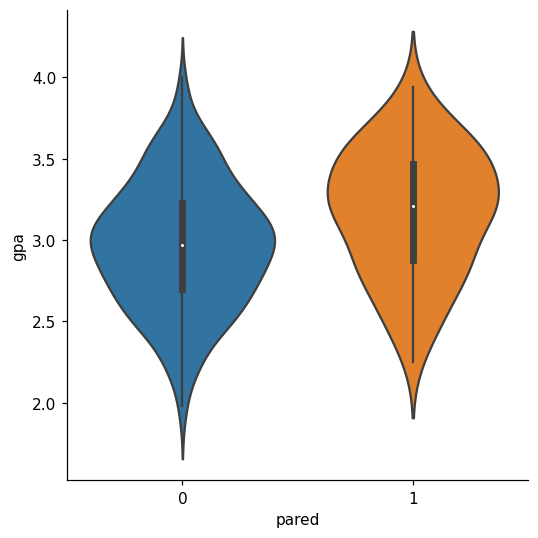

In [7]:
# whether the students are likely to apply for college admission based on their parents admission
sns.catplot(x="pared",y="gpa",data=df_student,kind="violin");

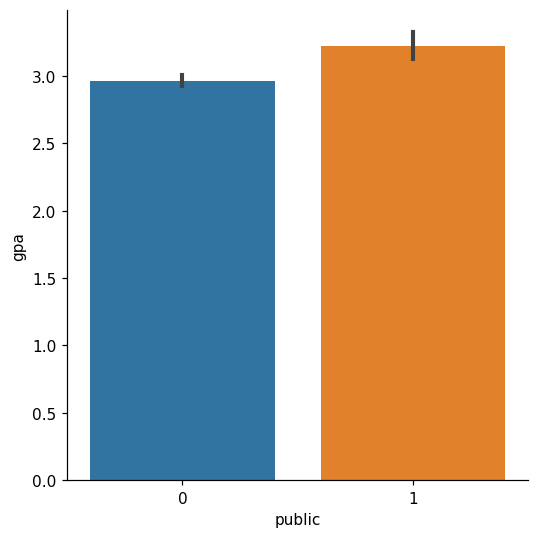

In [8]:
## Whether the students are likely to apply for college based on whether they studied in publib school or not
sns.catplot(x="public",y="gpa",data=df_student,kind="bar");

In [9]:
df_student.dtypes

apply     category
pared         int8
public        int8
gpa        float32
dtype: object

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
x = df_student.drop("apply",axis=1)

In [7]:
y = df_student["apply"]

In [8]:
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size=.2)

In [10]:
logit_multinomial = LogisticRegression().fit(x_tr,y_tr)

In [11]:
p = logit_multinomial.predict(x_test)

In [12]:
print(confusion_matrix(y_test,p))

[[ 3 27  0]
 [ 1 41  1]
 [ 3  4  0]]


In [13]:
accuracy_score(y_test,p)

0.55

In [14]:
## Ordinal logistic regression

In [9]:
df_student["apply_new"] = LabelEncoder().fit_transform(df_student["apply"])

In [10]:
df_student.loc[:,["apply","apply_new"]]

,apply,apply_new
0,very likely,2
1,somewhat likely,0
2,unlikely,1
3,somewhat likely,0
4,somewhat likely,0
...,...,...
395,unlikely,1
396,unlikely,1
397,somewhat likely,0
398,somewhat likely,0


In [11]:
df_student["apply_correct"]=df_student["apply"].map({"unlikely":0,"somewhat likely":1,"very likely":2})

In [12]:
df_student.head()

,apply,pared,public,gpa,apply_new,apply_correct
0,very likely,0,0,3.26,2,2
1,somewhat likely,1,0,3.21,0,1
2,unlikely,1,1,3.94,1,0
3,somewhat likely,0,0,2.81,0,1
4,somewhat likely,0,0,2.53,0,1


In [13]:
df_student.dtypes

apply            category
pared                int8
public               int8
gpa               float32
apply_new           int64
apply_correct    category
dtype: object

In [15]:
df_student["apply_correct"] = pd.to_numeric(df_student["apply_correct"])

In [16]:
df_student.dtypes

apply            category
pared                int8
public               int8
gpa               float32
apply_new           int64
apply_correct       int64
dtype: object

In [17]:
df_student1 = pd.DataFrame()

In [18]:
df_student1 = df_student

In [19]:
## Dropping the columns apply_new and apply

In [20]:
df_student1.drop(["apply","apply_new"],axis=1,inplace=True)

In [21]:
x_new = df_student1.drop("apply_correct",axis=1)

In [22]:
y_new = df_student1["apply_correct"]

In [23]:
x_tr,x_test,y_tr,y_test=train_test_split(x_new,y_new,test_size=.2)

In [24]:
logit_model_ordinal = LogisticRegression().fit(x_tr,y_tr)

In [25]:
p=logit_model_ordinal.predict(x_test)

In [26]:
accuracy_score(y_test,p)

0.575

In [27]:
prob = logit_model_ordinal.predict_proba(x_test)

In [28]:
df_train , df_test = train_test_split(df_student1,test_size=.2)

In [29]:
df_student1

,pared,public,gpa,apply_correct
0,0,0,3.26,2
1,1,0,3.21,1
2,1,1,3.94,0
3,0,0,2.81,1
4,0,0,2.53,1
...,...,...,...,...
395,0,0,3.70,0
396,0,0,2.63,0
397,0,0,2.25,1
398,0,0,3.26,1


In [30]:
mod_logit=OrderedModel.from_formula("apply_correct~pared+public+gpa",df_train,distr="logit",hasconst=False)

In [31]:
model = mod_logit.fit(method="bfgs")

Optimization terminated successfully.
         Current function value: 0.891572
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          apply_correct   Log-Likelihood:                -285.30
Model:                   OrderedModel   AIC:                             580.6
Method:            Maximum Likelihood   BIC:                             599.4
Date:                Thu, 10 Mar 2022                                         
Time:                        10:48:20                                         
No. Observations:                 320                                         
Df Residuals:                     315                                         
Df Model:                           5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pared          1.1140      0.294      3.789      0.000       0.538       1.690
public        -0.1443      0.326     -0.443      0.658      -0.783       0.494
gpa            0.6784      0.290      2.338      0.019       0.110       1.247
0.0/1.0        2.3065      0.863      2.672      0.008       0.615       3.998
1.0/2.0        0.8175      0.087      9.398      0.000       0.647       0.988
==============================================================================
"""